# 3D グラフ

## ファンデルワールスの状態方程式

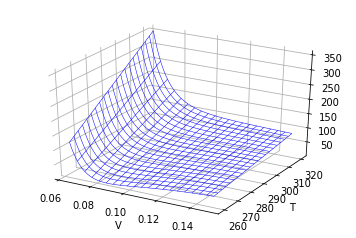

In [3]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# ファンデルワールスの状態方程式のパラメータ
a = 3.592
b = 0.0427
R = 0.08206

# パラメータ数
pointsnumber = 500
# 体積は x 軸
v = np.linspace(0.064, 0.15, pointsnumber)
# 温度は y 軸
t = np.linspace(260, 320, pointsnumber)
X, Y = np.meshgrid(v, t)
# 温度が z 軸
Z = (R * Y / (X - b)) - (a / X ** 2)

ax.plot_wireframe(X, Y, Z, rstride=25, cstride=25, lw=0.5, color='b')

plt.xlabel('V')

plt.ylabel('T')
plt.show()

## ワイヤーフレーム

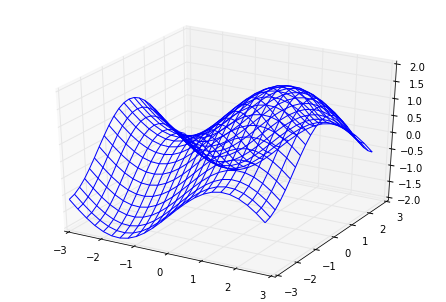

In [18]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def three_d_data_set():
    # メッシュに分割
    x = np.arange(-3, 3, 0.25)
    y = np.arange(-3, 3, 0.25)

    # meshgrid に入れるのがポイント
    X, Y = np.meshgrid(x, y)

    # 値の計算は Z に入れる: ベクトル計算を使っている
    Z = np.sin(X)+ np.cos(Y)

    return (X, Y, Z)

data3 = three_d_data_set()

# まず 2 次元の図を生成
fig = plt.figure()
# 3 次元に変換
ax = Axes3D(fig)
# プロット
ax.plot_wireframe(data3[0], data3[1], data3[2])

plt.show()

ワイヤフレーム以外にも表示がいろいろある.

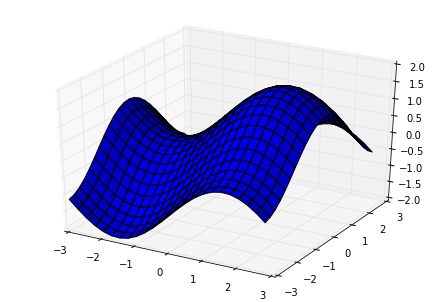

In [21]:
# サーフェス表示
data3 = three_d_data_set()
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(data3[0], data3[1], data3[2], rstride=1, cstride=1)
plt.show()

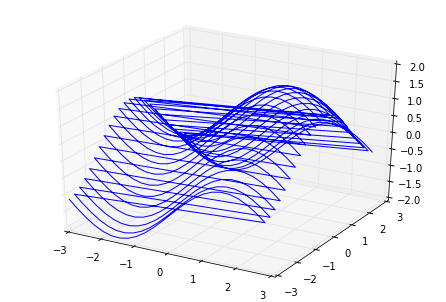

In [23]:
# 3 次元プロット
data3 = three_d_data_set()
fig = plt.figure()
ax = Axes3D(fig)
ax.plot3D(np.ravel(data3[0]),np.ravel(data3[1]),np.ravel(data3[2]))
plt.show()

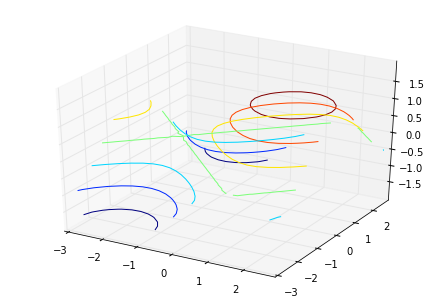

In [24]:
# 等高線 1
data3 = three_d_data_set()
fig = plt.figure()
ax = Axes3D(fig)
ax.contour3D(data3[0], data3[1], data3[2])
plt.show()

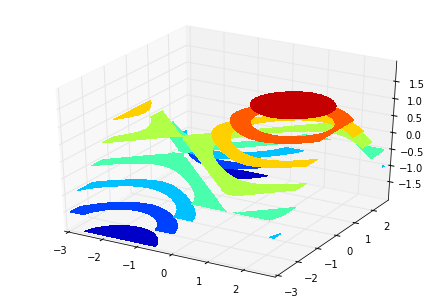

In [25]:
# 等高線 2
data3 = three_d_data_set()
fig = plt.figure()
ax = Axes3D(fig)
ax.contourf3D(data3[0], data3[1], data3[2])
plt.show()

# グリグリ動かす

普通に python として実行するとグリグリ動かせるようだが,
それは Jupyter Notebook 上でもできる.
ただし `%matplotlib inline` を既に実行しているノートブックでは,
グリグリ動かすための `%matplotlib notebook` が動かない.
math_simple_animation.ipynb にコードを置いているのでそちらで確認する.

## スライドバー

変数の値をスライドバーでグリグリ動かせる.
`ipywidgets` の `interact` を使う.

In [4]:
%matplotlib inline
from ipywidgets import interact
import numpy as np

def scatter(num_data):
    x = range(num_data)
    y = [np.sin(t/5.0) for t in x]
    plt.plot(x, y)
    plt.show()

interact(scatter, num_data=(1,200, 1), value=2)

interactive(children=(IntSlider(value=100, description='num_data', max=200, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.scatter>

## ちょっとしたアプリ的なものも作れる

プログレスバー的なサンプル.

In [1]:
%matplotlib inline

import pylab as plt
import time
from ipywidgets import FloatProgress
from IPython import display

prg = FloatProgress(min=0, max=99, value=1)
display.display(prg)

for i in range(100):
    prg.value = i
    time.sleep(0.01)

FloatProgress(value=1.0, max=99.0)

# アニメーション

<IPython.core.display.Javascript object>


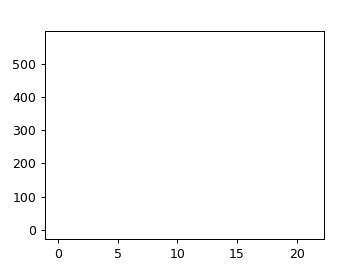

In [1]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class Ball:
    def __init__(self, m, x, y, vx, vy):
        self.m = m
        self.x, self.y = x, y
        self.vx, self.vy = vx, vy

    def run(self, fx, fy):
        self.x += self.vx
        self.y += self.vy
        self.vx += fx / self.m
        self.vy += fy / self.m

fig = plt.figure(figsize=(4,3))
images = []
ball = Ball(1,0,0,1,100)
for _ in range(22):
    image = plt.scatter([ball.x],[ball.y])
    images.append([image])
    fx = 0
    fy = -ball.m * 9.8
    ball.run(fx,fy)

ani = animation.ArtistAnimation(fig, images, interval=100, repeat_delay=1000)
plt.show()